# 最初的分类器

## digits数据集 

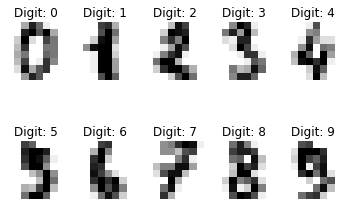

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

# 加载digits数据
digits = datasets.load_digits()

# 在第2行第5列显示图像
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: {0}'.format(label))
    
plt.show()

## 创建分类器进行评价

In [2]:
import numpy as np
from sklearn import datasets

# 读取手写数字的数据
digits = datasets.load_digits()

# 求出3和8的数据位置
flag_3_8 = (digits.target == 3) + (digits.target == 8)

# 获得3和8的数据
images = digits.images[flag_3_8]
labels = digits.target[flag_3_8]

# 把3和8的图像转成一维数组
images = images.reshape(images.shape[0], -1)

In [3]:
from sklearn import tree

# 把3和8的图像转成一维数组
images = images.reshape(images.shape[0], -1)

# 分类器的生成
n_samples = len(flag_3_8[flag_3_8])
print('n_samples:', n_samples)
train_size = int(n_samples * 3 / 5)
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(images[:train_size], labels[:train_size])

n_samples: 357


DecisionTreeClassifier(max_depth=3)

In [4]:
from sklearn import metrics

expected = labels[train_size:]
predicted  = classifier.predict(images[train_size:])

print('Accuracy:\n', metrics.accuracy_score(expected, predicted))

Accuracy:
 0.8811188811188811


## 查看手写数字图像分类器的性能

In [5]:
print('Accuracy:\n', metrics.accuracy_score(expected, predicted))
print('\nConfusion matrix:\n', metrics.confusion_matrix(expected, predicted))
print('\nPrecision;\n', metrics.precision_score(expected, predicted, pos_label=3))
print('\nRecall:\n', metrics.recall_score(expected, predicted, pos_label=3))
print('\nF-measure:\n', metrics.f1_score(expected, predicted, pos_label=3))

Accuracy:
 0.8811188811188811

Confusion matrix:
 [[62 13]
 [ 4 64]]

Precision;
 0.9393939393939394

Recall:
 0.8266666666666667

F-measure:
 0.8794326241134751


## ROC曲线绘制

In [6]:
from sklearn.metrics import roc_curve, auc
import numpy as np
# y  = np.array([1, 1, 2, 2])
# scores = np.array([0.1, 0.4, 0.35, 0.8])

fpr = np.array([0, 0.08, 0.09, 0.18, 0.18, 0.18, 0.27, 0.36, 0.45, 0.54, 0.63, 0.63, 0.76, 0.88, 1])
tpr = np.array([0, 0.12, 0.21, 0.26, 0.37, 0.47, 0.53, 0.58, 0.63, 0.68, 0.74, 0.84, 0.89, 0.94, 1])


# roc_curve的输入为
# y: 样本标签
# scores: 模型对样本属于正例的概率输出
# pos_label: 标记为正例的标签，本例中标记为2的即为正例
# fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
auc = metrics.auc(fpr, tpr)


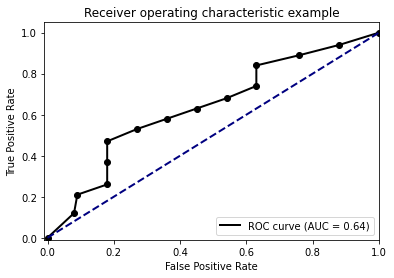

In [7]:
import matplotlib.pyplot as plt
plt.figure()
# 
lw = 2
plt.scatter(fpr, tpr, color='k')
plt.plot(fpr, tpr, color='k', lw=lw, label="ROC curve (AUC = %0.2f)" % auc)
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()